# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [330]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata,  how="outer")

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [331]:
# Checking the number of mice.
mouse_unique = mouse_study_df["Mouse ID"].unique()
mouse_count = len(mouse_unique) #Get length of unique values
mouse_count

249

In [332]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# test1 = subset=['Mouse ID', 'Timepoint'])
# tes1
# test2 = mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])
# test2
# test3 = mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])
# test3
# test4 = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
# test4

duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [333]:
# Optional: Get all the data for the duplicate mouse ID. 
# Apply loc to obtain the duplicate mouse ID
opt_duplicate_mice_df = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
opt_duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [334]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.i

# Filter the DataFrame based on the previous 'duplicate_mice' array (by ID)
# The isin() checks each element of 'mouse_study_df' Dataframe on 'duplicate_mice' array, which contains the duplicate 
# mouse ID value 'g989' 

data_ms_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mice)==False]
data_ms_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [335]:
# Checking the number of mice in the clean DataFrame.
mouse_clean = data_ms_df["Mouse ID"].unique()
mouse_clean_count = len(mouse_clean) #get length 
mouse_clean_count

248

## Summary Statistics

In [336]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

sum_st_mean = data_ms_df['Tumor Volume (mm3)'].groupby(data_ms_df['Drug Regimen']).mean()
sum_st_median = data_ms_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
sum_st_var = data_ms_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
sum_st_std = data_ms_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sum_st_sem = data_ms_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Create dataframe
summary_std_df = pd.DataFrame({"Mean Tumor Volume":sum_st_mean, 
                               "Median Tumor Volume":sum_st_median, 
                               "Tumor Volume Variance":sum_st_var, 
                               "Tumor Volume Std. Dev.":sum_st_std, 
                               "Tumor Volume Std. Err.":sum_st_sem})
#display dataframe 
summary_std_df 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [337]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_std_table = data_ms_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

#This will calculate the mean, median, variance, standard deviation, and standard error of the mean 
#for the 'Tumor Volume (mm3)' column grouped by the 'Drug Regimen' column.

summary_std_table



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

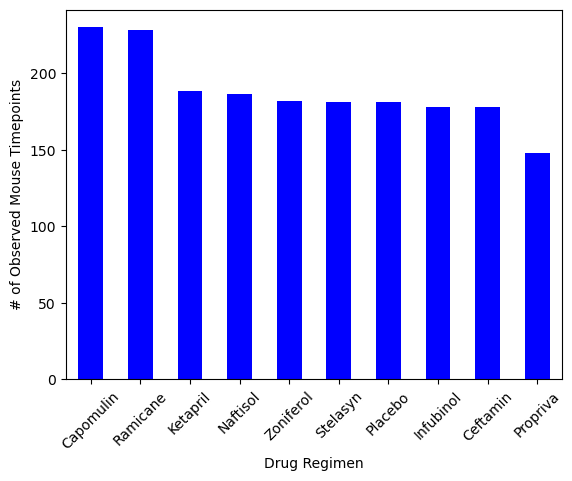

In [338]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_ms_bar_pandas = data_ms_df["Drug Regimen"].value_counts() #Let's get count occurrences of each value in "Drug Regimen" column
plt.xlabel("Drug Regimen") #Set X-axis Label
plt.ylabel("# of Observed Mouse Timepoints") #Set Y-axis Label
data_ms_bar_pandas_plot = data_ms_bar_pandas.plot.bar(color='b',rot=45) #Set bar plot pandas
plt.show() #show bar chart

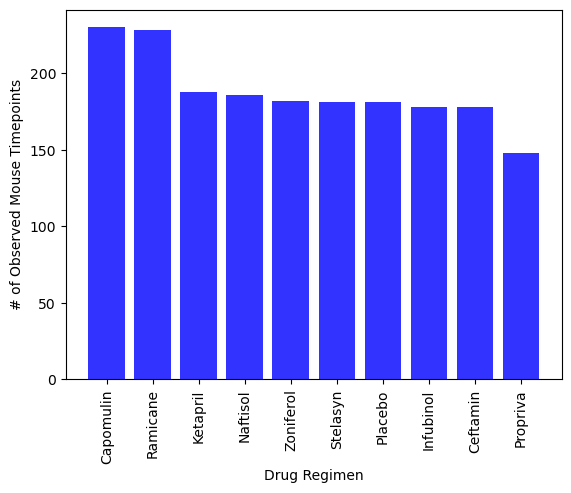

In [339]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis_array = np.arange(0, len(data_ms_bar_pandas)) #get index x_axis -> array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Final x_axis
x_axis = x_axis_array.tolist() #convert array to a list ->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

x_axis_array_values = data_ms_bar_pandas.index.values #get x_axis values
#array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
#        'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
#       dtype=object)

x_axis_list_values = x_axis_array_values.tolist() #Convert array to list

#y_axis
y_axis = data_ms_bar_pandas.values #array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

# Tell matplotlib that I will be making a bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align="center")

# Tell matplotlib where I would like to place each of the x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis_list_values, rotation="vertical")

#Set x axis label and y axis label
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#Display the plot
plt.show() 

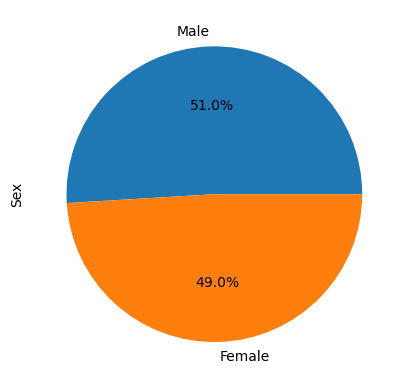

In [340]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_ms_pie_pandas = data_ms_df["Sex"].value_counts() #Let's get count occurrences of each value in "Sex" column
data_ms_pie_pandas.plot(kind="pie", autopct = "%1.1f%%") #pie plot showing the distribution of female versus male mice using Pandas
plt.ylabel("Sex")
plt.show() #Display the plot

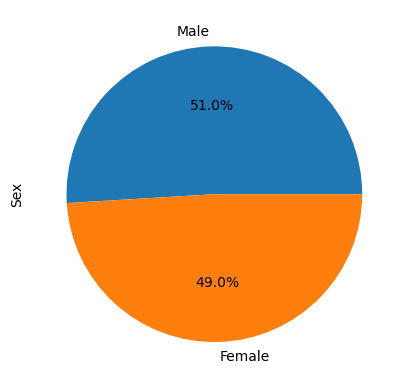

In [341]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data_ms_pie_plot = data_ms_df["Sex"].value_counts() #Let's get count occurrences of each value in "Sex" column

# # Labels for the sections of the pie chart
labels = data_ms_pie_pandas.index.values.tolist() # -> ["Male","Female"]

# The values of each section of the pie chart
sizes = data_ms_pie_pandas.tolist() #  -> [958,922]

plt.ylabel("Sex")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, autopct= "%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [342]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = data_ms_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_greatest_ms_df = pd.merge(greatest_timepoint, data_ms_df, on=(["Mouse ID", "Timepoint"]))
data_greatest_ms_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [343]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # Loc for every treatment row and "Tumor Volume (mm3)" column
    tumor_vol_per_treatm = data_greatest_ms_df.loc[data_greatest_ms_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    
    # add subset 
    tumor_vol_data_list.append(tumor_vol_per_treatm)
#     print(tumor_vol_data_list)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_per_treatm.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    if treatment == "Capomulin":
         print("Capomulin's potential outliers:" + str(lower_bound) + " " + str(upper_bound))
    elif treatment == "Ramicane":
         print("Ramicane's potential outliers:" + str(lower_bound) + " " + str(upper_bound))
    elif treatment == "Infubinol":
         print("Infubinol's potential outliers:" + str(lower_bound) + " " + str(upper_bound))
    elif treatment == "Ceftamin":
         print("Ceftamin's potential outliers:" + str(lower_bound) + " " + str(upper_bound))


Capomulin's potential outliers:20.70456164999999 51.83201549
Ramicane's potential outliers:17.912664470000003 54.30681135
Infubinol's potential outliers:36.83290494999999 82.74144559000001
Ceftamin's potential outliers:25.355449580000002 87.66645829999999


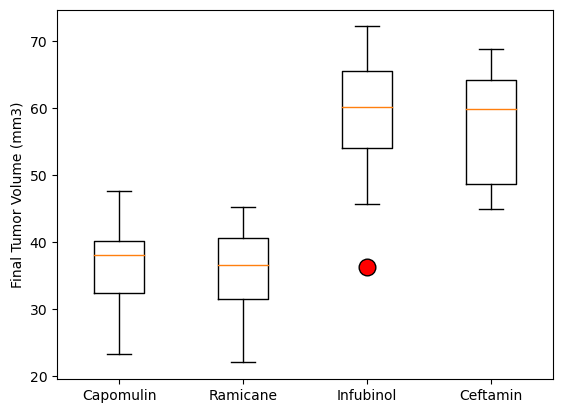

In [344]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots() #Figure size
flierprops = dict(markerfacecolor='red',
                  linestyle='none', markeredgecolor='black', markersize=12)

plt.boxplot(tumor_vol_data_list, widths = 0.4, flierprops=flierprops, vert=True) #Generate the box plot

plt.xticks([1,2,3,4], treatment_list) #Set x ticks to treatment list
plt.ylabel("Final Tumor Volume (mm3)") #Set y label
plt.show() #show the box plot


## Line and Scatter Plots

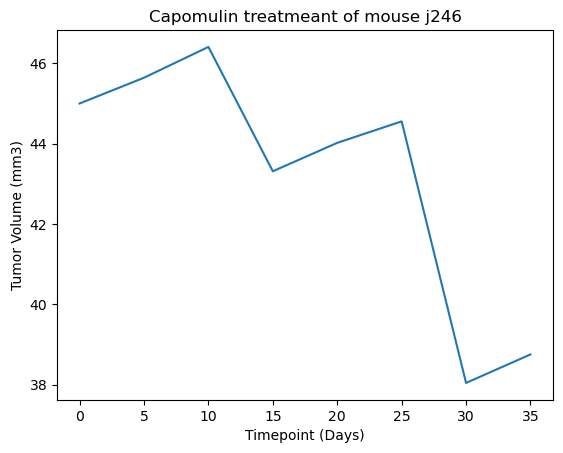

In [345]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
data_ms_capomulin_df = data_ms_df.loc[(data_ms_df["Drug Regimen"] == "Capomulin")]

#Let's get a single mouse treated with Capomulin j246
Capomulin_line_df = data_ms_capomulin_df.loc[data_ms_capomulin_df["Mouse ID"] == "j246",:]

x_axis = Capomulin_line_df["Timepoint"]
y_axis = Capomulin_line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse j246')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis)
plt.show()

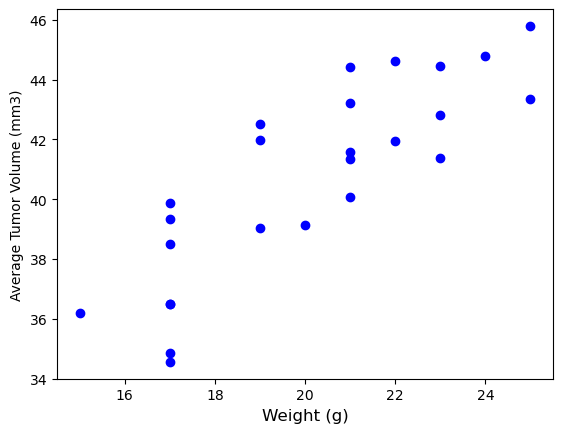

In [346]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# data_ms_capomulin_scatter_df = data_ms_df.loc[data_ms_df["Drug Regimen"] == "Capomulin"]

data_ms_capomulin_scatter_df = data_ms_capomulin_df.copy()

#Need to drop str columns to solve the following error -> TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric
data_ms_capomulin_scatter_df = data_ms_capomulin_scatter_df.drop('Drug Regimen', axis=1)
data_ms_capomulin_scatter_df = data_ms_capomulin_scatter_df.drop('Sex', axis=1)
data_ms_capomulin_scatter_df.head()

#The average observed tumor volume for the entire Capomulin regimen
data_ms_capomulin_scatter_df = data_ms_capomulin_scatter_df.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots()
plt.scatter(data_ms_capomulin_scatter_df['Weight (g)'],data_ms_capomulin_scatter_df['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.841936342469472


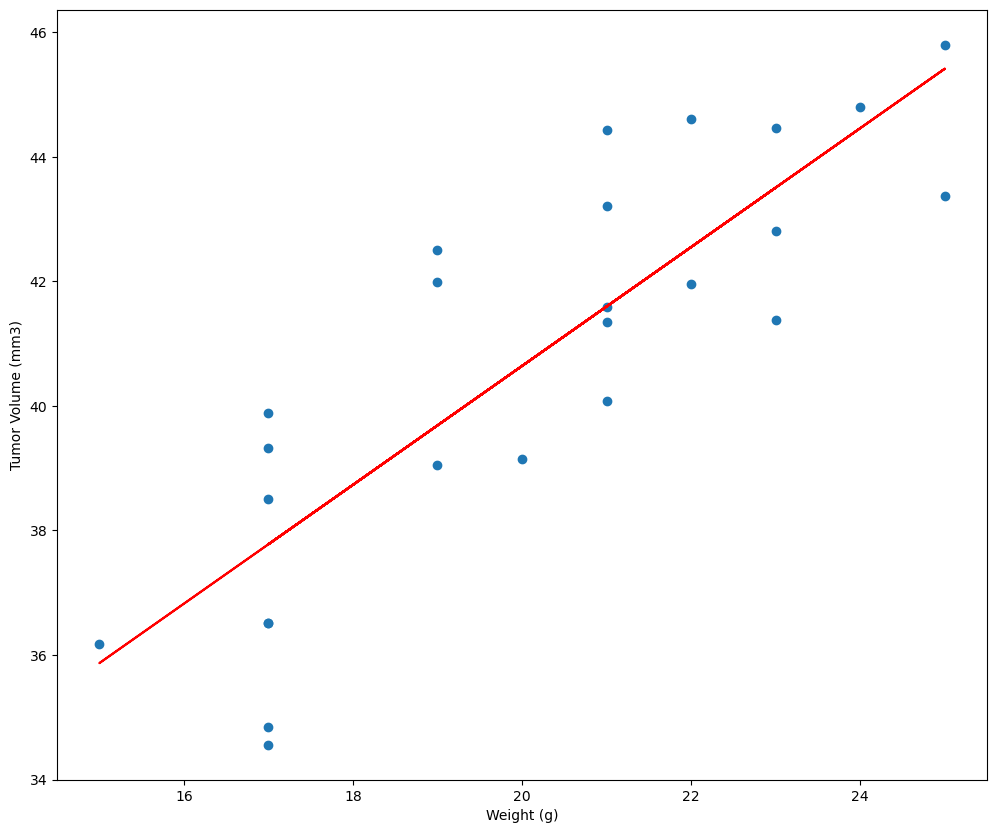

In [348]:
# Calculate the correlation coefficient and a linear regression model 

x_ave_weight_value = data_ms_capomulin_scatter_df['Weight (g)']
y_ave_vol_value = data_ms_capomulin_scatter_df['Tumor Volume (mm3)']

# Correlation
correlation = st.pearsonr(data_ms_capomulin_scatter_df['Weight (g)'], data_ms_capomulin_scatter_df['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ave_weight_value, y_ave_vol_value)

# y = mx + b
regress_values = x_ave_weight_value * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Line to plot
plt.figure(figsize=(12,10))
plt.scatter(x_ave_weight_value, y_ave_vol_value)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_ave_weight_value,regress_values,"r-") # regression line
plt.show() # Show the plot